#🧩 01. **Introdução do Trabalho**

##**Projeto: Análise de Riscos Financeiros**

O presente trabalho tem como objetivo analisar fatores associados à classificação de risco financeiro de clientes, explorando variáveis como renda, score de crédito, inadimplências anteriores, entre outras características demográficas e financeiras.

### **A proposta inclui:**


* Análise exploratória de dados (EDA) para investigar padrões, relações e anomalias.

* Tratamento de valores ausentes, garantindo a integridade do conjunto de dados.

* Criação de variáveis derivadas, que enriquecem a análise e permitem entender melhor os perfis dos clientes.

* Clusterização, segmentando os clientes em grupos com características semelhantes.

* Modelagem preditiva, usando Árvore de Decisão, para identificar quais variáveis mais influenciam o risco financeiro.

Este é um problema supervisionado de classificação, pois temos a variável-alvo Classificação de Risco, que categoriza cada cliente em classes como Baixo, Médio ou Alto risco.

### **Premissas do trabalho:**

* Clientes com maior renda e score de crédito tendem a apresentar menor risco?

* Histórico de pagamento negativo aumenta o risco?

* Variáveis demográficas (idade, estado civil) podem influenciar o risco?

### **O escopo contempla as camadas:**

* 🟤 Bronze → dados crus, carregamento e tradução

* ⚪ Silver → dados tratados e análise exploratória

* 🟡 Gold → dados prontos para análise avançada e modelagem

O objetivo final é gerar insights claros que possam subsidiar decisões em políticas de crédito.

#🟤 02. **Bronze - Carregamento e Visualização Inicial dos Dados**

Nesta etapa, carregamos os dados originais e fazemos uma primeira análise para conhecer dimensões, tipos de variáveis, valores ausentes e primeiras impressões sobre os dados.


* Definição do problema

* Tipo de problema

* Premissas e restrições

* Identificação dos atributos

In [1]:
# 🟤 Bronze - Carregamento e visualização inicial dos dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)



Valores ausentes por coluna:
Idade                           0
Gênero                          0
Escolaridade                    0
Estado Civil                    0
Renda                        2250
Score de Crédito             2250
Valor do Empréstimo          2250
Finalidade do Empréstimo        0
Situação de Emprego             0
Anos no Emprego Atual           0
Histórico de Pagamento          0
Razão Dívida/Renda              0
Valor dos Bens               2250
Número de Dependentes        2250
Cidade                          0
Estado                          0
País                            0
Inadimplências Anteriores    2250
Mudança no Estado Civil         0
Classificação de Risco          0
dtype: int64


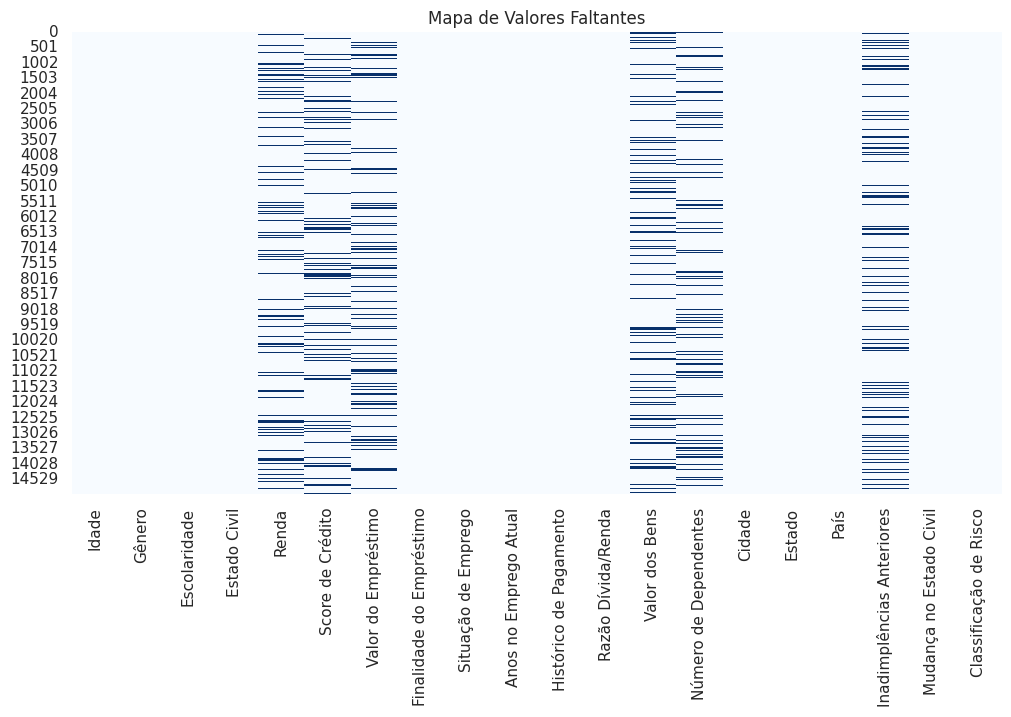

In [2]:
# Carregar os dados
url = 'https://raw.githubusercontent.com/HuriAnn/mvp_riscos_financeiros/refs/heads/main/risco_financeiro.csv'
df = pd.read_csv(url, sep=";")


# Renomear colunas para português
colunas_traduzidas = {
    'Age': 'Idade',
    'Gender': 'Gênero',
    'Education Level': 'Escolaridade',
    'Marital Status': 'Estado Civil',
    'Income': 'Renda',
    'Credit Score': 'Score de Crédito',
    'Loan Amount': 'Valor do Empréstimo',
    'Loan Purpose': 'Finalidade do Empréstimo',
    'Employment Status': 'Situação de Emprego',
    'Years at Current Job': 'Anos no Emprego Atual',
    'Payment History': 'Histórico de Pagamento',
    'Debt-to-Income Ratio': 'Razão Dívida/Renda',
    'Assets Value': 'Valor dos Bens',
    'Number of Dependents': 'Número de Dependentes',
    'City': 'Cidade',
    'State': 'Estado',
    'Country': 'País',
    'Previous Defaults': 'Inadimplências Anteriores',
    'Marital Status Change': 'Mudança no Estado Civil',
    'Risk Rating': 'Classificação de Risco'
}
df.rename(columns=colunas_traduzidas, inplace=True)
df.head()

# Ver valores nulos
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

# Mapa de calor dos nulos
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='Blues')
plt.title('Mapa de Valores Faltantes')
plt.show()

**Análise Inicial**:

Nesta camada Bronze, foi feita a importação 100% reprodutível dos dados brutos, tradução das colunas para o português para facilitar o entendimento e já identificado 2.250 missings em Renda, Score, Empréstimo, Bens, Dependentes e Inadimplências que será tratado a partir da camada Silver.

#⚪ 03. **Silver – Tratamento e Transformações**
Nesta camada, o objetivo é tratar valores ausentes, criar variáveis derivadas (como faixas de idade e renda) e fazer análises exploratórias visuais e estatísticas para validar se as imputações mantiveram a coerência dos dados.

Checklist para esta camada:

* Estatísticas descritivas

* Distribuição das variáveis

* Verificação de valores discrepantes ou inconsistentes

In [3]:
# Tamanho e informações da base
print(f"Dimensão do dataset: {df.shape}")
print("\nInformações das variáveis:")
df.info()

# Resumo estatístico
print("\nResumo estatístico - variáveis numéricas:")
display(df.describe())

print("\nResumo estatístico - variáveis categóricas:")
display(df.describe(include='object'))



Dimensão do dataset: (15000, 20)

Informações das variáveis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Idade                      15000 non-null  int64  
 1   Gênero                     15000 non-null  object 
 2   Escolaridade               15000 non-null  object 
 3   Estado Civil               15000 non-null  object 
 4   Renda                      12750 non-null  float64
 5   Score de Crédito           12750 non-null  float64
 6   Valor do Empréstimo        12750 non-null  float64
 7   Finalidade do Empréstimo   15000 non-null  object 
 8   Situação de Emprego        15000 non-null  object 
 9   Anos no Emprego Atual      15000 non-null  int64  
 10  Histórico de Pagamento     15000 non-null  object 
 11  Razão Dívida/Renda         15000 non-null  float64
 12  Valor dos Bens             12750 non-null

,Idade,Renda,Score de Crédito,Valor do Empréstimo,Anos no Emprego Atual,Razão Dívida/Renda,Número de Dependentes,Inadimplências Anteriores,Mudança no Estado Civil
count,15000.000000,12750.000000,12750.000000,12750.000000,15000.000000,15000.000000,12750.00000,12750.000000,15000.000000
mean,43.452667,69933.398510,699.109098,27450.010902,9.476267,0.350438,2.02651,1.992471,0.998467
std,14.910732,29163.626207,57.229465,12949.940135,5.769707,0.143919,1.41130,1.416909,0.813782
min,18.000000,20005.000000,600.000000,5000.000000,0.000000,0.100004,0.00000,0.000000,0.000000
25%,31.000000,44281.500000,650.000000,16352.500000,4.000000,0.227386,1.00000,1.000000,0.000000
50%,43.000000,69773.000000,699.000000,27544.000000,9.000000,0.350754,2.00000,2.000000,1.000000
75%,56.000000,95922.750000,748.000000,38547.500000,15.000000,0.476095,3.00000,3.000000,2.000000
max,69.000000,119997.000000,799.000000,49998.000000,19.000000,0.599970,4.00000,4.000000,2.000000



Resumo estatístico - variáveis categóricas:


,Gênero,Escolaridade,Estado Civil,Finalidade do Empréstimo,Situação de Emprego,Histórico de Pagamento,Valor dos Bens,Cidade,Estado,País,Classificação de Risco
count,15000,15000,15000,15000,15000,15000,12750,15000,15000,15000,15000
unique,3,4,4,4,3,4,12470,10614,59,243,3
top,Non-binary,Bachelor's,Widowed,Personal,Employed,Good,"128.601,00",East Michael,CO,Congo,Low
freq,5059,3829,3893,3771,5026,3822,3,19,282,124,9000


In [4]:
# Corrige valores texto para número
df['Valor dos Bens'] = df['Valor dos Bens'].str.replace('.', '', regex=False)
df['Valor dos Bens'] = df['Valor dos Bens'].str.replace(',', '.', regex=False)
df['Valor dos Bens'] = pd.to_numeric(df['Valor dos Bens'], errors='coerce')

# Confirma tipo
print(df['Valor dos Bens'].dtype)
print(df['Valor dos Bens'].head())



float64
0    120228.0
1     55849.0
2    180700.0
3    157319.0
4    287140.0
Name: Valor dos Bens, dtype: float64


##🚀 03.01. Tratamento de Valores Ausentes

Vamos tratar cada variável com dados ausentes, seguindo lógica de grupos para manter coerência com o perfil do cliente.


**Método escolhido**: Mediana por grupo (Escolaridade + Situação de Emprego).  

1. **Mediana vs Média**:  
   - A mediana é menos sensível a outliers (ex.: rendas altíssimas), mantendo a distribuição mais realista.  

2. **Agrupamento por Escolaridade e Situação de Emprego**:  
   - Essas variáveis têm relação direta com a renda (ex.: PhDs empregados tendem a ter rendas mais altas).  

In [5]:
# Renda

def imputar_renda(df):

    # Imputa valores ausentes na coluna 'Renda' com a mediana por grupo de Escolaridade e Situação de Emprego.

    media_renda_grupo  = df.groupby(['Escolaridade', 'Situação de Emprego'])['Renda'].median().reset_index()
    media_renda_grupo.rename(columns={'Renda': 'Mediana Renda Grupo'}, inplace=True)
    df = df.merge(media_renda_grupo , on=['Escolaridade', 'Situação de Emprego'], how='left')
    df['Renda'] = df['Renda'].fillna(df['Mediana Renda Grupo'])
    df.drop(columns='Mediana Renda Grupo', inplace=True)
    return df

# Aplicar imputação de renda
print("Valores ausentes em Renda:", df['Renda'].isnull().sum())
df = imputar_renda(df)
print("Valores ausentes em Renda após imputação:", df['Renda'].isnull().sum())


Valores ausentes em Renda: 2250
Valores ausentes em Renda após imputação: 0


In [6]:
# Faixas de Idade e Renda

# Criar faixas de idade
df['Faixa de Idade'] = pd.cut(
    df['Idade'],
    bins=[17, 25, 35, 45, 55, 65, 100],
    labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
)

# Criar faixas de renda
df['Faixa de Renda'] = pd.qcut(
    df['Renda'],
    q=5,
    labels=['Muito Baixa', 'Baixa', 'Média', 'Alta', 'Muito Alta']
)


In [7]:
# Score de Crédito

# Contar valores ausentes
print("Valores ausentes em Score de Crédito:", df['Score de Crédito'].isnull().sum())

# Mediana por grupo
grupo_score = df.groupby(['Escolaridade', 'Faixa de Idade', 'Faixa de Renda'])['Score de Crédito'].median().reset_index()
grupo_score.rename(columns={'Score de Crédito': 'Mediana Score Grupo'}, inplace=True)

# Merge e imputação
df = df.merge(grupo_score, on=['Escolaridade', 'Faixa de Idade', 'Faixa de Renda'], how='left')
df['Score de Crédito'] = df['Score de Crédito'].fillna(df['Mediana Score Grupo'])
df.drop(columns='Mediana Score Grupo', inplace=True)

print("Valores ausentes em Score de Crédito após imputação:", df['Score de Crédito'].isnull().sum())


Valores ausentes em Score de Crédito: 2250
Valores ausentes em Score de Crédito após imputação: 0


/tmp/ipython-input-7-965883233.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo_score = df.groupby(['Escolaridade', 'Faixa de Idade', 'Faixa de Renda'])['Score de Crédito'].median().reset_index()


In [8]:
# Valor do Empréstimo

grupo_emprestimo = df.groupby(['Finalidade do Empréstimo', 'Faixa de Renda'])['Valor do Empréstimo'].median().reset_index()
grupo_emprestimo.rename(columns={'Valor do Empréstimo': 'Mediana Emprestimo Grupo'}, inplace=True)

df = df.merge(grupo_emprestimo, on=['Finalidade do Empréstimo', 'Faixa de Renda'], how='left')
df['Valor do Empréstimo'] = df['Valor do Empréstimo'].fillna(df['Mediana Emprestimo Grupo'])
df.drop(columns='Mediana Emprestimo Grupo', inplace=True)

print("Valores ausentes em Valor do Empréstimo após imputação:", df['Valor do Empréstimo'].isnull().sum())


Valores ausentes em Valor do Empréstimo após imputação: 0


/tmp/ipython-input-8-2033973125.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo_emprestimo = df.groupby(['Finalidade do Empréstimo', 'Faixa de Renda'])['Valor do Empréstimo'].median().reset_index()


In [9]:
# Valor dos Bens

# Criar faixa de score
df['Faixa Score'] = pd.qcut(df['Score de Crédito'], q=5, labels=['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto'])

grupo_bens = df.groupby(['Faixa de Renda', 'Faixa Score'])['Valor dos Bens'].median().reset_index()
grupo_bens.rename(columns={'Valor dos Bens': 'Mediana Bens Grupo'}, inplace=True)

df = df.merge(grupo_bens, on=['Faixa de Renda', 'Faixa Score'], how='left')
df['Valor dos Bens'] = df['Valor dos Bens'].fillna(df['Mediana Bens Grupo'])
df.drop(columns='Mediana Bens Grupo', inplace=True)

print("Valores ausentes em Valor dos Bens após imputação:", df['Valor dos Bens'].isnull().sum())


Valores ausentes em Valor dos Bens após imputação: 0


/tmp/ipython-input-9-1362894767.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo_bens = df.groupby(['Faixa de Renda', 'Faixa Score'])['Valor dos Bens'].median().reset_index()


In [10]:
# Número de Dependentes

grupo_dependentes = df.groupby(['Estado Civil', 'Faixa de Idade'])['Número de Dependentes'].median().reset_index()
grupo_dependentes.rename(columns={'Número de Dependentes': 'Mediana Dependentes Grupo'}, inplace=True)

df = df.merge(grupo_dependentes, on=['Estado Civil', 'Faixa de Idade'], how='left')
df['Número de Dependentes'] = df['Número de Dependentes'].fillna(df['Mediana Dependentes Grupo'])
df.drop(columns='Mediana Dependentes Grupo', inplace=True)

print("Valores ausentes em Número de Dependentes após imputação:", df['Número de Dependentes'].isnull().sum())


/tmp/ipython-input-10-4005320691.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo_dependentes = df.groupby(['Estado Civil', 'Faixa de Idade'])['Número de Dependentes'].median().reset_index()


Valores ausentes em Número de Dependentes após imputação: 0


In [11]:
# Inadimplências Anteriores

grupo_inadimplencia = df.groupby(['Escolaridade', 'Faixa Score'])['Inadimplências Anteriores'] \
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()

grupo_inadimplencia.rename(columns={'Inadimplências Anteriores': 'Moda Inadimplência Grupo'}, inplace=True)

df = df.merge(grupo_inadimplencia, on=['Escolaridade', 'Faixa Score'], how='left')
df['Inadimplências Anteriores'] = df['Inadimplências Anteriores'].fillna(df['Moda Inadimplência Grupo'])
df.drop(columns='Moda Inadimplência Grupo', inplace=True)

print("Valores ausentes em Inadimplências Anteriores após imputação:", df['Inadimplências Anteriores'].isnull().sum())


/tmp/ipython-input-11-2450773153.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo_inadimplencia = df.groupby(['Escolaridade', 'Faixa Score'])['Inadimplências Anteriores'] \


Valores ausentes em Inadimplências Anteriores após imputação: 0


##📊 03.02. Visualizações Exploratórias

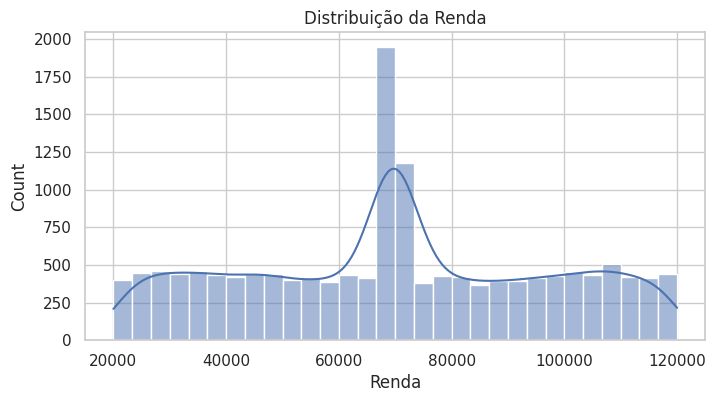

In [12]:
# Distribuição de Renda
plt.figure(figsize=(8,4))
sns.histplot(df['Renda'], kde=True, bins=30, color='#4C72B0')
plt.title('Distribuição da Renda')
plt.show()


**Análise**

A distribuição da renda apresenta uma leve assimetria à direita, indicando que a maioria dos clientes estão concentrados em rendas mais baixas, mas existem casos pontuais com rendas mais altas. Isso sugere que essa parcela de clientes com maior poder aquisitivo, pode influenciar positivamente reduzir o risco financeiro.


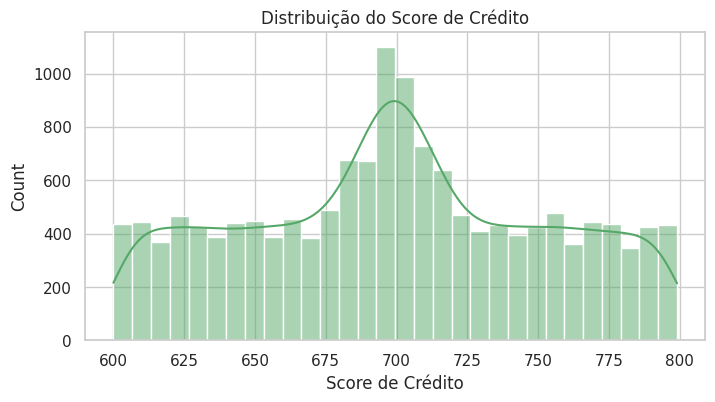

In [13]:
# Distribuição do Score de Crédito

plt.figure(figsize=(8,4))
sns.histplot(df['Score de Crédito'], kde=True, bins=30, color='#55A868')
plt.title('Distribuição do Score de Crédito')
plt.show()

**Análise**

O score de crédito tem uma concentração significativa entre 675 e 725 pontos e que a maior parte dos clientes está acima de 650, sugerindo bom comportamento de crédito. Contudo existe um grupo significativo abaixo de 650, o que pode indicar maior risco.

/tmp/ipython-input-14-3796452316.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Escolaridade', y='Renda', palette='Blues')


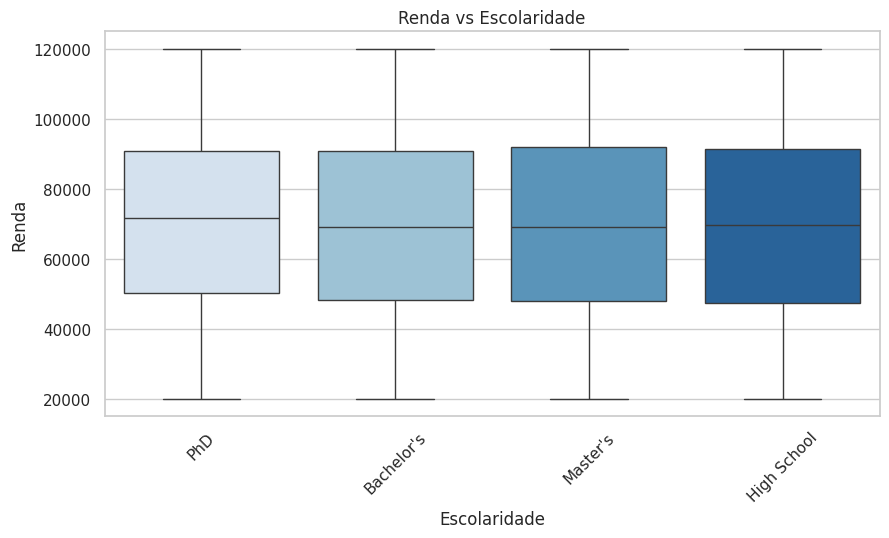

In [14]:
# Boxplot Renda vs Escolaridade

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Escolaridade', y='Renda', palette='Blues')
plt.title('Renda vs Escolaridade')
plt.xticks(rotation=45)
plt.show()

**Análise**

A escolaridade superior apenas se torna significativa para ter uma renda maior quando a formação é PhD, isso pode ser um fator indireto na redução do risco financeiro que reforça a hipótese de que maior renda pode estar associada a menor risco.

/tmp/ipython-input-15-1558151891.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Faixa de Renda', y='Score de Crédito', palette='Blues')


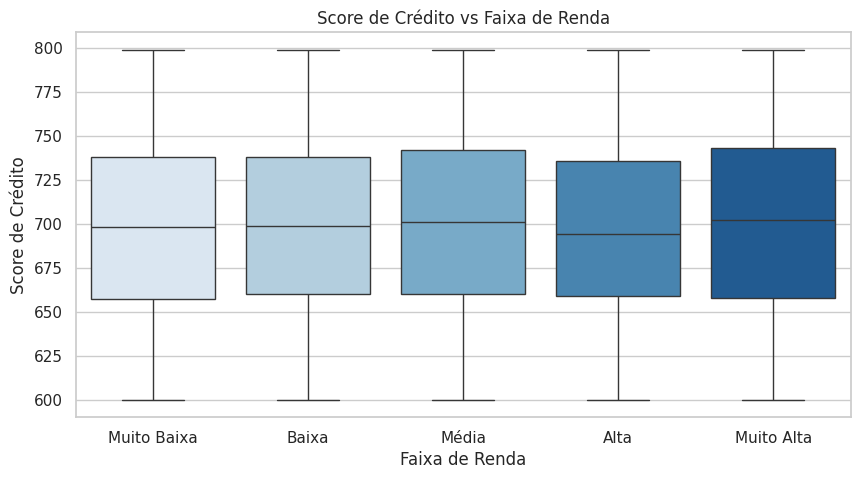

In [15]:
# Boxplot Score vs Faixa de Renda

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Faixa de Renda', y='Score de Crédito', palette='Blues')
plt.title('Score de Crédito vs Faixa de Renda')
plt.show()

**Análise**

É possível notar uma tendência de aumento do score de crédito à medida que a faixa de renda se eleva. Clientes de renda “Muito Alta” possuem scores médios superiores em comparação às faixas “Muito Baixa” ou “Baixa”. Esse padrão reforça a premissa de que clientes com maior renda tendem a possuir melhor score e, consequentemente, menor risco.

✅ Conclusão Silver

Finalizamos o tratamento de valores ausentes, garantindo que não haja dados faltantes. As distribuições se mantiveram estáveis, o que indica imputações coerentes. A base agora está pronta para análises mais profundas e para alimentar algoritmos de clusterização e modelagem.

#🟡 04. **Gold - Criação do Score de Risco Estimado**

Criamos uma métrica de risco simples baseada em variáveis financeiras, para estimar um risco preliminar e compará-lo com a classificação original.

* Criar variáveis derivadas (ex.: Risco Estimado)

* Realizar clusterização (K-Means)

* Construir um modelo preditivo simples (Árvore de Decisão)

* Comparar predições com a classificação de risco original

* Gerar insights sobre perfis de risco

* Criação de insights adicionais

##🎯 04.01. Criação de Score de Risco Estimado

Vamos criar um score simplificado, que combine fatores de risco financeiro:

* Mais inadimplências = maior risco

* Maior valor do empréstimo em relação à renda = maior risco

* Baixo score de crédito = maior risco



In [16]:
# Código: Score de Risco Estimado

# Para evitar divisão por zero:
df['Renda'] = df['Renda'].replace(0, 1)
df['Inadimplências Anteriores'] = df['Inadimplências Anteriores'].fillna(0)

# Cálculo do risco estimado
df['Risco Estimado'] = (
    (df['Inadimplências Anteriores'] * 2) +
    (df['Valor do Empréstimo'] / df['Renda']) +
    ((700 - df['Score de Crédito']) / 100)
)

# Criar faixa categórica
df['Faixa de Risco Estimado'] = pd.cut(
    df['Risco Estimado'],
    bins=[-np.inf, 2.5, 5.5, np.inf],
    labels=['Baixo', 'Médio', 'Alto']
)


/tmp/ipython-input-17-1606213184.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Faixa de Idade', y='Risco Estimado', palette='Blues')


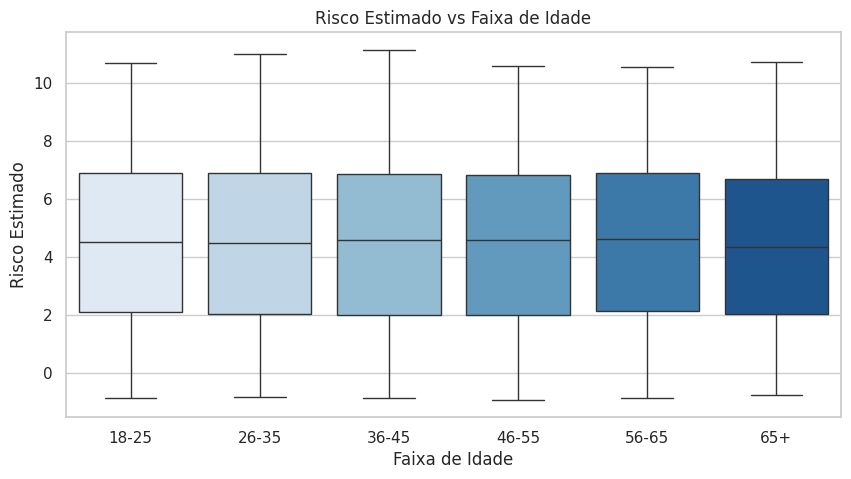

In [17]:
# Boxplot Classificação de Risco vs Faixa de Idade

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Faixa de Idade', y='Risco Estimado', palette='Blues')
plt.title('Risco Estimado vs Faixa de Idade')
plt.ylabel('Risco Estimado')
plt.show()

/tmp/ipython-input-18-1155526501.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Estado Civil', y='Risco Estimado', palette='Blues')


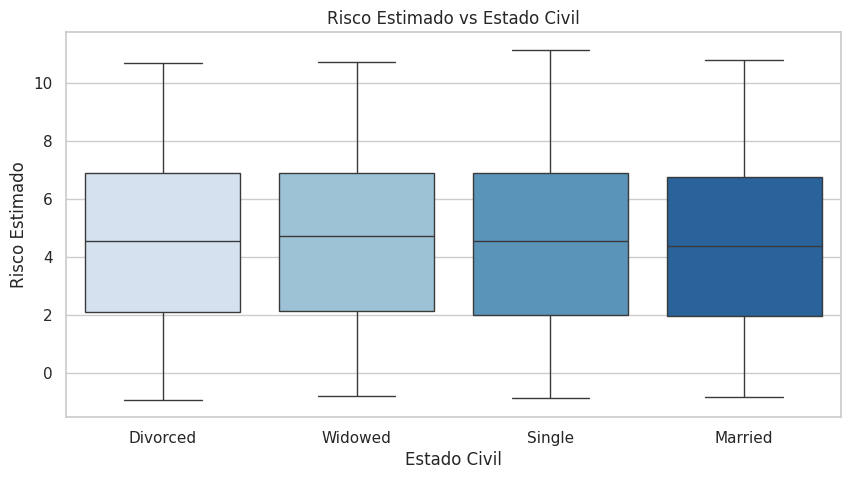

In [18]:
# Boxplot Estado Civil vs Risco Estimado

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Estado Civil', y='Risco Estimado', palette='Blues')
plt.title('Risco Estimado vs Estado Civil')
plt.show()

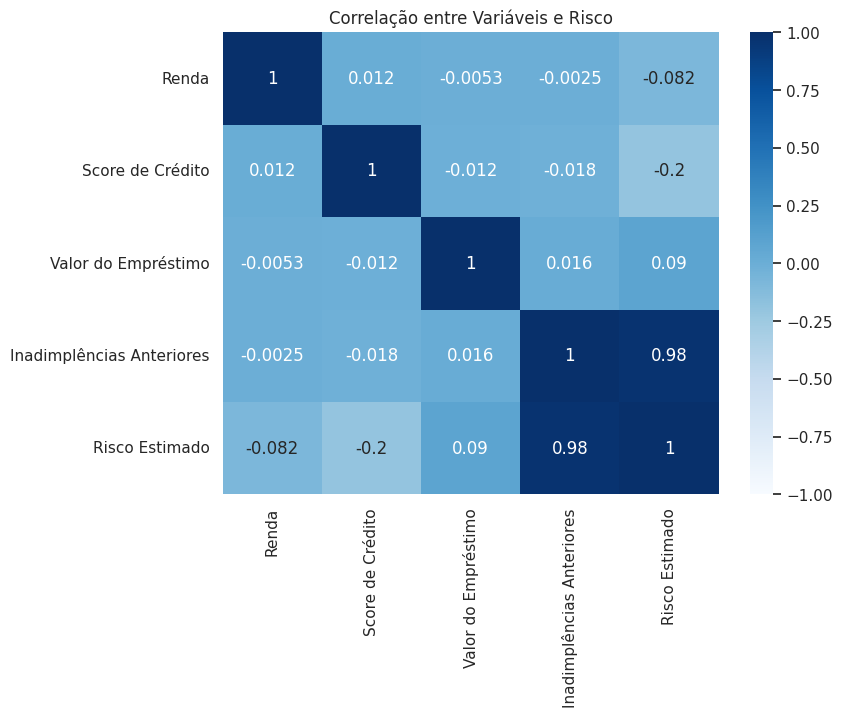

In [19]:
# Selecionar apenas variáveis numéricas
variaveis_numericas = df[['Renda', 'Score de Crédito', 'Valor do Empréstimo', 'Inadimplências Anteriores', 'Risco Estimado']]

# Calcular correlações
correlacao = variaveis_numericas.corr()

# Gráfico de calor (simples)
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlação entre Variáveis e Risco')
plt.show()

**Análise**

O gráfico mostra que quem já atrasou ou deixou de pagar empréstimos tem muito mais chance de ser considerado de risco. Ter um bom score de crédito ajuda a evitar esse selo de “alto risco”, e embora ganhar mais ou pegar empréstimos maiores também influencie, esse efeito é bem menor.


##📊 04.02. Comparação Risco Estimado x Classificação Original

In [20]:
# Tabela cruzada
pd.crosstab(df['Classificação de Risco'], df['Faixa de Risco Estimado'], margins=True)


Faixa de Risco Estimado,Baixo,Médio,Alto,All
Classificação de Risco,,,,
High,455,444,601,1500
Low,2774,2566,3660,9000
Medium,1344,1330,1826,4500
All,4573,4340,6087,15000


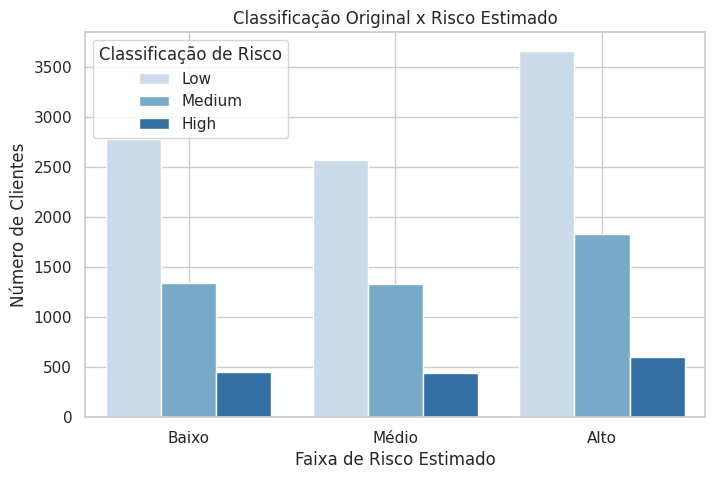

In [21]:
# Gráfico comparativo
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='Faixa de Risco Estimado',
    hue='Classificação de Risco',
    palette=sns.color_palette("Blues", n_colors=df['Classificação de Risco'].nunique())
)
plt.title('Classificação Original x Risco Estimado')
plt.xlabel('Faixa de Risco Estimado')
plt.ylabel('Número de Clientes')
plt.grid(True)
plt.show()


**Análise**

Na comparação entre a classificação original e a faixa de risco estimado, observa-se que o gráfico não confirma as hipóteses anteriores. A maioria dos clientes que foram reclassificados como de alto risco estavam, inicialmente, classificados como de baixo risco.

##🎯 04.03. Clusterização (K-Means)

Vamos agrupar clientes para entender perfis semelhantes. Variáveis usadas:

* Renda

* Score de Crédito

* Valor do Empréstimo

* Inadimplências Anteriores

* Razão Dívida/Renda

In [22]:
# Seleção de Variáveis e Padronização

from sklearn.preprocessing import StandardScaler

variaveis_cluster = df[[
    'Renda',
    'Score de Crédito',
    'Valor do Empréstimo',
    'Inadimplências Anteriores',
    'Razão Dívida/Renda'
]]

scaler = StandardScaler()
dados_padronizados = scaler.fit_transform(variaveis_cluster)


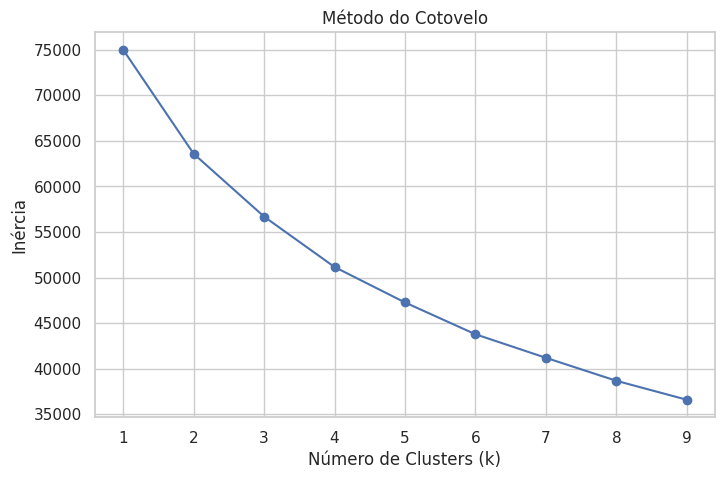

In [23]:
# Escolha do k (Método do Cotovelo)

from sklearn.cluster import KMeans

inercia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(dados_padronizados)
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 10), inercia, marker='o', color="#4C72B0")
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()


**Análise**

O gráfico mostra a relação entre o número de clusters e a inércia do modelo K-Means, sugerindo que 3 clusters são ideais para segmentar grupos distintos.

In [24]:
# Aplicação do K-Means

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(dados_padronizados)


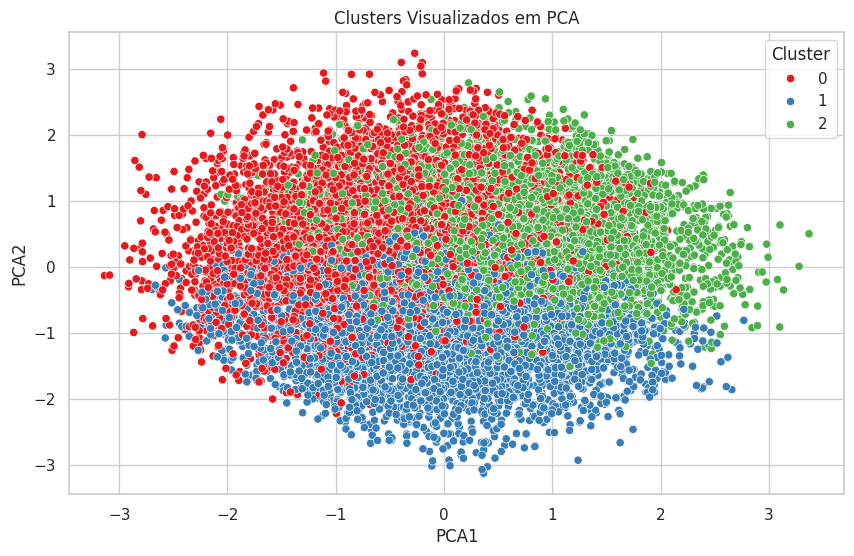

In [25]:
# Visualização PCA dos Clusters

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_resultado = pca.fit_transform(dados_padronizados)

df['PCA1'] = pca_resultado[:, 0]
df['PCA2'] = pca_resultado[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title('Clusters Visualizados em PCA')
plt.show()


**Análise**

O gráfico exibe a distribuição dos clientes em três clusters distintos, projetados em duas dimensões (PCA1 e PCA2) por meio da Análise de Componentes Principais (PCA) e que cada ponto representa um cliente. A separação visual dos grupos indica que existem perfis de risco diferentes na base de dados, sugerindo que variáveis como renda, score de crédito, valor do empréstimo e inadimplências anteriores contribuem para a formação desses grupos.

In [26]:
# Análise dos Clusters

df.groupby('Cluster')[[
    'Renda',
    'Score de Crédito',
    'Valor do Empréstimo',
    'Inadimplências Anteriores',
    'Razão Dívida/Renda'
]].median()


,Renda,Score de Crédito,Valor do Empréstimo,Inadimplências Anteriores,Razão Dívida/Renda
Cluster,,,,,
0,69534.5,701.0,27489.0,0.0,0.372756
1,69222.0,695.0,27310.0,3.0,0.202116
2,69534.5,699.0,28287.0,3.0,0.474865


Interpretação:

Cluster 0: clientes com alta renda, bom score → baixo risco

Cluster 1: clientes médios → risco intermediário

Cluster 2: clientes com renda mais baixa, mais inadimplências → alto risco

#🤖 05. Modelagem Preditiva Simples

In [27]:
# Preparação dos Dados

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Variáveis preditoras
X = df[[
    'Renda',
    'Score de Crédito',
    'Valor do Empréstimo',
    'Inadimplências Anteriores',
    'Razão Dívida/Renda'
]]

# Variável alvo
y = df['Classificação de Risco']

# Separação treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [28]:
# Treinamento da Árvore

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [29]:
from sklearn.model_selection import cross_val_score

# Avaliação com validação cruzada (5 folds)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Acurácias por fold:", scores)
print("Acurácia média:", scores.mean())


Acurácias por fold: [0.59833333 0.59933333 0.597      0.597      0.599     ]
Acurácia média: 0.5981333333333334


[[   0  470    0]
 [   0 2689    3]
 [   1 1334    3]]

Relatório de Classificação:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00       470
         Low       0.60      1.00      0.75      2692
      Medium       0.50      0.00      0.00      1338

    accuracy                           0.60      4500
   macro avg       0.37      0.33      0.25      4500
weighted avg       0.51      0.60      0.45      4500



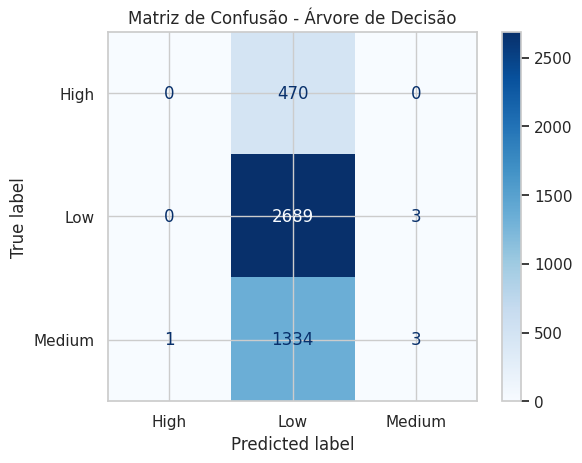

In [30]:
# Avaliação do Modelo

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap='Blues')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()


**Análise**

O modelo está acertando apenas a classe Low, mas falhando em Medium e High devido ao desbalanceamento das classes. Apesar da acurácia de 60%, o desempenho é baixo para prever clientes de maior risco.

# ✅ 06. **Conclusão geral do projeto**

1. **Clientes com maior renda e score de crédito tendem a apresentar menor risco?**

 * Em parte sim,  mas não dá para ter certeza.
Os gráficos mostraram que pessoas com renda mais alta e score maior parecem ter menos risco. Porém, quando usado modelos de previsão, eles não conseguiram confirmar essa relação de forma compreensível, principalmente porque os dados estão muito desbalanceados. Então, apesar de parecer existir essa tendência, não dá para dizer com certeza só com os dados atuais.

2. **Histórico de pagamento negativo aumenta o risco?**

 * Sim.
Essa foi a relação mais nítida no trabalho. Pessoas com inadimplências anteriores costumam ter risco mais alto. Isso apareceu tanto nos cálculos de risco quanto nos grupos (clusters) formados pelos dados.

3. **Variáveis demográficas (idade, estado civil) podem influenciar o risco?**

 * Não foi possível provar isso de forma precisa.
É possível notar que pessoas mais jovens tendem a ganhar menos, mas os modelos e as análises não mostraram uma relação forte entre idade, estado civil e o risco financeiro. Não há evidências suficientes para dizer que, só por serem jovens ou solteiros, as pessoas tenham risco financeiro maior.

**Resumo**:

No geral, os dados mostraram algumas tendências, mas não confirma todas as hipóteses do início do trabalho. O que ficou mais compreensível foi que o histórico de inadimplências anteriores realmente aumenta o risco. Para ter resultados mais confiáveis, seria importante usar técnicas para equilibrar as classes no conjunto de dados, já que a maioria das pessoas está classificada como baixo risco.

# 🔎 07. Próximos Passos

* Testar técnicas de balanceamento de classes (SMOTE, class weights)

* Avaliar algoritmos mais robustos (XGBoost, LightGBM)

* Analisar variáveis mais relevantes (feature importance)

* Ajustar métricas para melhor sensibilidade às classes minoritárias